In [2]:
import pandas as pd
import numpy as np

In [3]:
loans = pd.read_csv('lending-club-data.csv')

/Users/chnagikchoi/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (19,47) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


In [4]:
list(loans.columns.values)

['id',
 'member_id',
 'loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'term',
 'int_rate',
 'installment',
 'grade',
 'sub_grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'annual_inc',
 'is_inc_v',
 'issue_d',
 'loan_status',
 'pymnt_plan',
 'url',
 'desc',
 'purpose',
 'title',
 'zip_code',
 'addr_state',
 'dti',
 'delinq_2yrs',
 'earliest_cr_line',
 'inq_last_6mths',
 'mths_since_last_delinq',
 'mths_since_last_record',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'initial_list_status',
 'out_prncp',
 'out_prncp_inv',
 'total_pymnt',
 'total_pymnt_inv',
 'total_rec_prncp',
 'total_rec_int',
 'total_rec_late_fee',
 'recoveries',
 'collection_recovery_fee',
 'last_pymnt_d',
 'last_pymnt_amnt',
 'next_pymnt_d',
 'last_credit_pull_d',
 'collections_12_mths_ex_med',
 'mths_since_last_major_derog',
 'policy_code',
 'not_compliant',
 'status',
 'inactive_loans',
 'bad_loans',
 'emp_length_num',
 'grade_num',
 'sub_grade_num',
 'delinq_2yrs_zero',
 'pub_rec

In order to make this more intuitive and consistent with the lectures, we reassign the target to be:

+1 as a safe loan<br>
-1 as a risky (bad) loan


In [5]:
loans['safe_loans'] = loans['bad_loans'].apply(lambda x : +1 if x == 0 else -1)
loans.drop(['bad_loans'], inplace = True, axis = 1)

The features we will be using are described in the code comments below. Extract these feature columns and target column from the dataset. We will only use these features

In [6]:
target = 'safe_loans'
features = ['grade',                     # grade of the loan (categorical)
            'sub_grade_num',             # sub-grade of the loan as a number from 0 to 1
            'short_emp',                 # one year or less of employment
            'emp_length_num',            # number of years of employment
            'home_ownership',            # home_ownership status: own, mortgage or rent
            'dti',                       # debt to income ratio
            'purpose',                   # the purpose of the loan
            'payment_inc_ratio',         # ratio of the monthly payment to income
            'delinq_2yrs',               # number of delinquincies
             'delinq_2yrs_zero',          # no delinquincies in last 2 years
            'inq_last_6mths',            # number of creditor inquiries in last 6 months
            'last_delinq_none',          # has borrower had a delinquincy
            'last_major_derog_none',     # has borrower had 90 day or worse rating
            'open_acc',                  # number of open credit accounts
            'pub_rec',                   # number of derogatory public records
            'pub_rec_zero',              # no derogatory public records
            'revol_util',                # percent of available credit being used
            'total_rec_late_fee',        # total late fees received to day
            'int_rate',                  # interest rate of the loan
            'total_rec_int',             # interest received to date
            'annual_inc',                # annual income of borrower
            'funded_amnt',               # amount committed to the loan
            'funded_amnt_inv',           # amount committed by investors for the loan
            'installment',               # monthly payment owed by the borrower
           ]

Skipping observations with missing values

Recall from the lectures that one common approach to coping with missing values is to skip observations that contain missing values.

In [59]:
extracted_loans = loans[features + [target]]
print "Before delete NaN rows : " , extracted_loans.shape
extracted_loans = extracted_loans.dropna(how = 'any')
print "After delete NaN rows : " , extracted_loans.shape
onehot_encoded_loans = pd.get_dummies(extracted_loans)

Before delete NaN rows :  (122607, 25)
After delete NaN rows :  (122578, 25)


In [61]:
print extracted_loans.shape
print onehot_encoded_loans.shape
print list(onehot_encoded_loans.columns.values)

(122578, 25)
(122578, 45)
['sub_grade_num', 'short_emp', 'emp_length_num', 'dti', 'payment_inc_ratio', 'delinq_2yrs', 'delinq_2yrs_zero', 'inq_last_6mths', 'last_delinq_none', 'last_major_derog_none', 'open_acc', 'pub_rec', 'pub_rec_zero', 'revol_util', 'total_rec_late_fee', 'int_rate', 'total_rec_int', 'annual_inc', 'funded_amnt', 'funded_amnt_inv', 'installment', 'safe_loans', 'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F', 'grade_G', 'home_ownership_MORTGAGE', 'home_ownership_OTHER', 'home_ownership_OWN', 'home_ownership_RENT', 'purpose_car', 'purpose_credit_card', 'purpose_debt_consolidation', 'purpose_home_improvement', 'purpose_house', 'purpose_major_purchase', 'purpose_medical', 'purpose_moving', 'purpose_other', 'purpose_small_business', 'purpose_vacation', 'purpose_wedding']


In [64]:
import json
with open('train-idx.json') as data_files:
    train_idx = json.load(data_files)
with open('validation-idx.json') as data_files:
    validation_idx = json.load(data_files)

In [190]:
train_data = onehot_encoded_loans.iloc[train_idx]
validation_data = onehot_encoded_loans.iloc[validation_idx]

In [191]:
import sklearn
import sklearn.ensemble
import numpy as np

In [192]:
train_X = train_data.ix[ : , train_data.columns != 'safe_loans']
train_y = train_data.ix[ : , train_data.columns == 'safe_loans']
print train_X.shape , train_y.shape
valid_X = validation_data.ix[ : , validation_data.columns != 'safe_loans']
valid_y = validation_data.ix[ : , validation_data.columns == 'safe_loans']

(37219, 44) (37219, 1)


In [193]:
boosting_tree = sklearn.ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators=5)

In [194]:
boosting_tree.fit(train_X, train_y)

/Users/chnagikchoi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=5, presort='auto',
              random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [195]:
validation_safe_loans = validation_data[validation_data[target] == 1]
validation_risky_loans = validation_data[validation_data[target] == -1]

sample_validation_data_risky = validation_risky_loans[0:2]
sample_validation_data_safe = validation_safe_loans[0:2]

sample_validation_data = sample_validation_data_safe.append(sample_validation_data_risky)
sample_validation_data

,sub_grade_num,short_emp,emp_length_num,dti,payment_inc_ratio,delinq_2yrs,delinq_2yrs_zero,inq_last_6mths,last_delinq_none,last_major_derog_none,...,purpose_debt_consolidation,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_small_business,purpose_vacation,purpose_wedding
22,0.2,0,3,29.44,6.30496,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
26,0.6,1,1,12.19,13.49520,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
24,0.4,0,3,13.97,2.96736,3,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
41,1.0,0,11,16.33,1.90524,0,1,0,1,1,...,1,0,0,0,0,0,0,0,0,0


In [196]:
print "Sample y values : ", list(sample_validation_data['safe_loans'])
predictions = boosting_tree.predict(sample_validation_data.ix[ : , sample_validation_data.columns != 'safe_loans'])
print "Sample predictions : " , predictions

Sample y values :  [1, 1, -1, -1]
Sample predictions :  [ 1  1 -1  1]


In [197]:
#Probability 
boosting_tree.predict_proba(sample_validation_data.ix[ :, sample_validation_data.columns != 'safe_loans'])

array([[ 0.41642331,  0.58357669],
       [ 0.46949689,  0.53050311],
       [ 0.53807792,  0.46192208],
       [ 0.39591639,  0.60408361]])

In [198]:
valid_predictions = boosting_tree.predict(valid_X)

In [199]:
#Accuracy on validation set
print (list(valid_predictions) == valid_y).sum() / float(len(valid_y))
boosting_tree.score(valid_X, valid_y)

safe_loans    0.661353
dtype: float64


0.66135286514433433

In [200]:
positive_prediction = np.where(valid_predictions == 1)[0]
false_positive = (valid_y.iloc[positive_prediction] == -1).sum()
print "false positive : ", false_positive

false positive :  safe_loans    1653
dtype: int64


In [201]:
negative_prediction = np.where(valid_predictions == -1)[0]
false_negative = (valid_y.iloc[negative_prediction] == 1).sum()
print "false negative : ", false_negative

false negative :  safe_loans    1491
dtype: int64


In [202]:
print false_negative * 10000 + false_positive * 20000

safe_loans    47970000
dtype: int64


In [203]:
valid_proba = boosting_tree.predict_proba(valid_X)

In [204]:
validation_data['prediction'] = valid_proba[:,1]

/Users/chnagikchoi/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [210]:
validation_data = validation_data.sort(['prediction'], ascending = [0])

In [220]:
pd.set_option('display.height', 1000)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 50)
pd.set_option('display.width', 1000)

height has been deprecated.



In [225]:
validation_data.columns.values

array(['sub_grade_num', 'short_emp', 'emp_length_num', 'dti',
       'payment_inc_ratio', 'delinq_2yrs', 'delinq_2yrs_zero',
       'inq_last_6mths', 'last_delinq_none', 'last_major_derog_none',
       'open_acc', 'pub_rec', 'pub_rec_zero', 'revol_util',
       'total_rec_late_fee', 'int_rate', 'total_rec_int', 'annual_inc',
       'funded_amnt', 'funded_amnt_inv', 'installment', 'safe_loans',
       'grade_A', 'grade_B', 'grade_C', 'grade_D', 'grade_E', 'grade_F',
       'grade_G', 'home_ownership_MORTGAGE', 'home_ownership_OTHER',
       'home_ownership_OWN', 'home_ownership_RENT', 'purpose_car',
       'purpose_credit_card', 'purpose_debt_consolidation',
       'purpose_home_improvement', 'purpose_house',
       'purpose_major_purchase', 'purpose_medical', 'purpose_moving',
       'purpose_other', 'purpose_small_business', 'purpose_vacation',
       'purpose_wedding', 'prediction'], dtype=object)

In [244]:
#Check what grade top5 samples have
print validation_data.iloc[0:5,20:28]

        installment  safe_loans  grade_A  grade_B  grade_C  grade_D  grade_E  grade_F
8021         365.01          -1        1        0        0        0        0        0
73426        228.27           1        1        0        0        0        0        0
7271         437.32           1        1        0        0        0        0        0
71667        243.49           1        1        0        0        0        0        0
109114       927.96           1        1        0        0        0        0        0


In [245]:
model_10 = sklearn.ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators=10)
model_50 = sklearn.ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators=50)
model_100 = sklearn.ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators=100)
model_200 = sklearn.ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators=200)
model_500 = sklearn.ensemble.GradientBoostingClassifier(max_depth = 6, n_estimators=500)

In [246]:
model_10.fit(train_X, train_y)
model_50.fit(train_X, train_y)
model_100.fit(train_X, train_y)
model_200.fit(train_X, train_y)
model_500.fit(train_X, train_y)

/Users/chnagikchoi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chnagikchoi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chnagikchoi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/chnagikchoi/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expec

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=6, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=500,
              presort='auto', random_state=None, subsample=1.0, verbose=0,
              warm_start=False)

In [247]:
print model_10.score(valid_X, valid_y)
print model_50.score(valid_X, valid_y)
print model_100.score(valid_X, valid_y)
print model_200.score(valid_X, valid_y)
print model_500.score(valid_X, valid_y)

0.665445928479
0.684403274451
0.690650581646
0.68935803533
0.689788884102


In [248]:
import matplotlib.pyplot as plt
%matplotlib inline
def make_figure(dim, title, xlabel, ylabel, legend):
    plt.rcParams['figure.figsize'] = dim
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    if legend is not None:
        plt.legend(loc=legend, prop={'size':15})
    plt.rcParams.update({'font.size': 16})
    plt.tight_layout()

In [249]:
train_err_10 = 1 - model_10.score(train_X, train_y)
train_err_50 = 1 - model_50.score(train_X, train_y)
train_err_100 = 1 - model_100.score(train_X, train_y)
train_err_200 = 1 - model_200.score(train_X, train_y)
train_err_500 = 1 - model_500.score(train_X, train_y)

training_errors = [train_err_10, train_err_50, train_err_100, train_err_200, train_err_500]

In [250]:
valid_err_10 = 1 - model_10.score(valid_X, valid_y)
valid_err_50 = 1 - model_50.score(valid_X, valid_y)
valid_err_100 = 1 - model_100.score(valid_X, valid_y)
valid_err_200 = 1 - model_200.score(valid_X, valid_y)
valid_err_500 = 1 - model_500.score(valid_X, valid_y)

validation_errors = [valid_err_10, valid_err_50, valid_err_100, valid_err_200, valid_err_500]

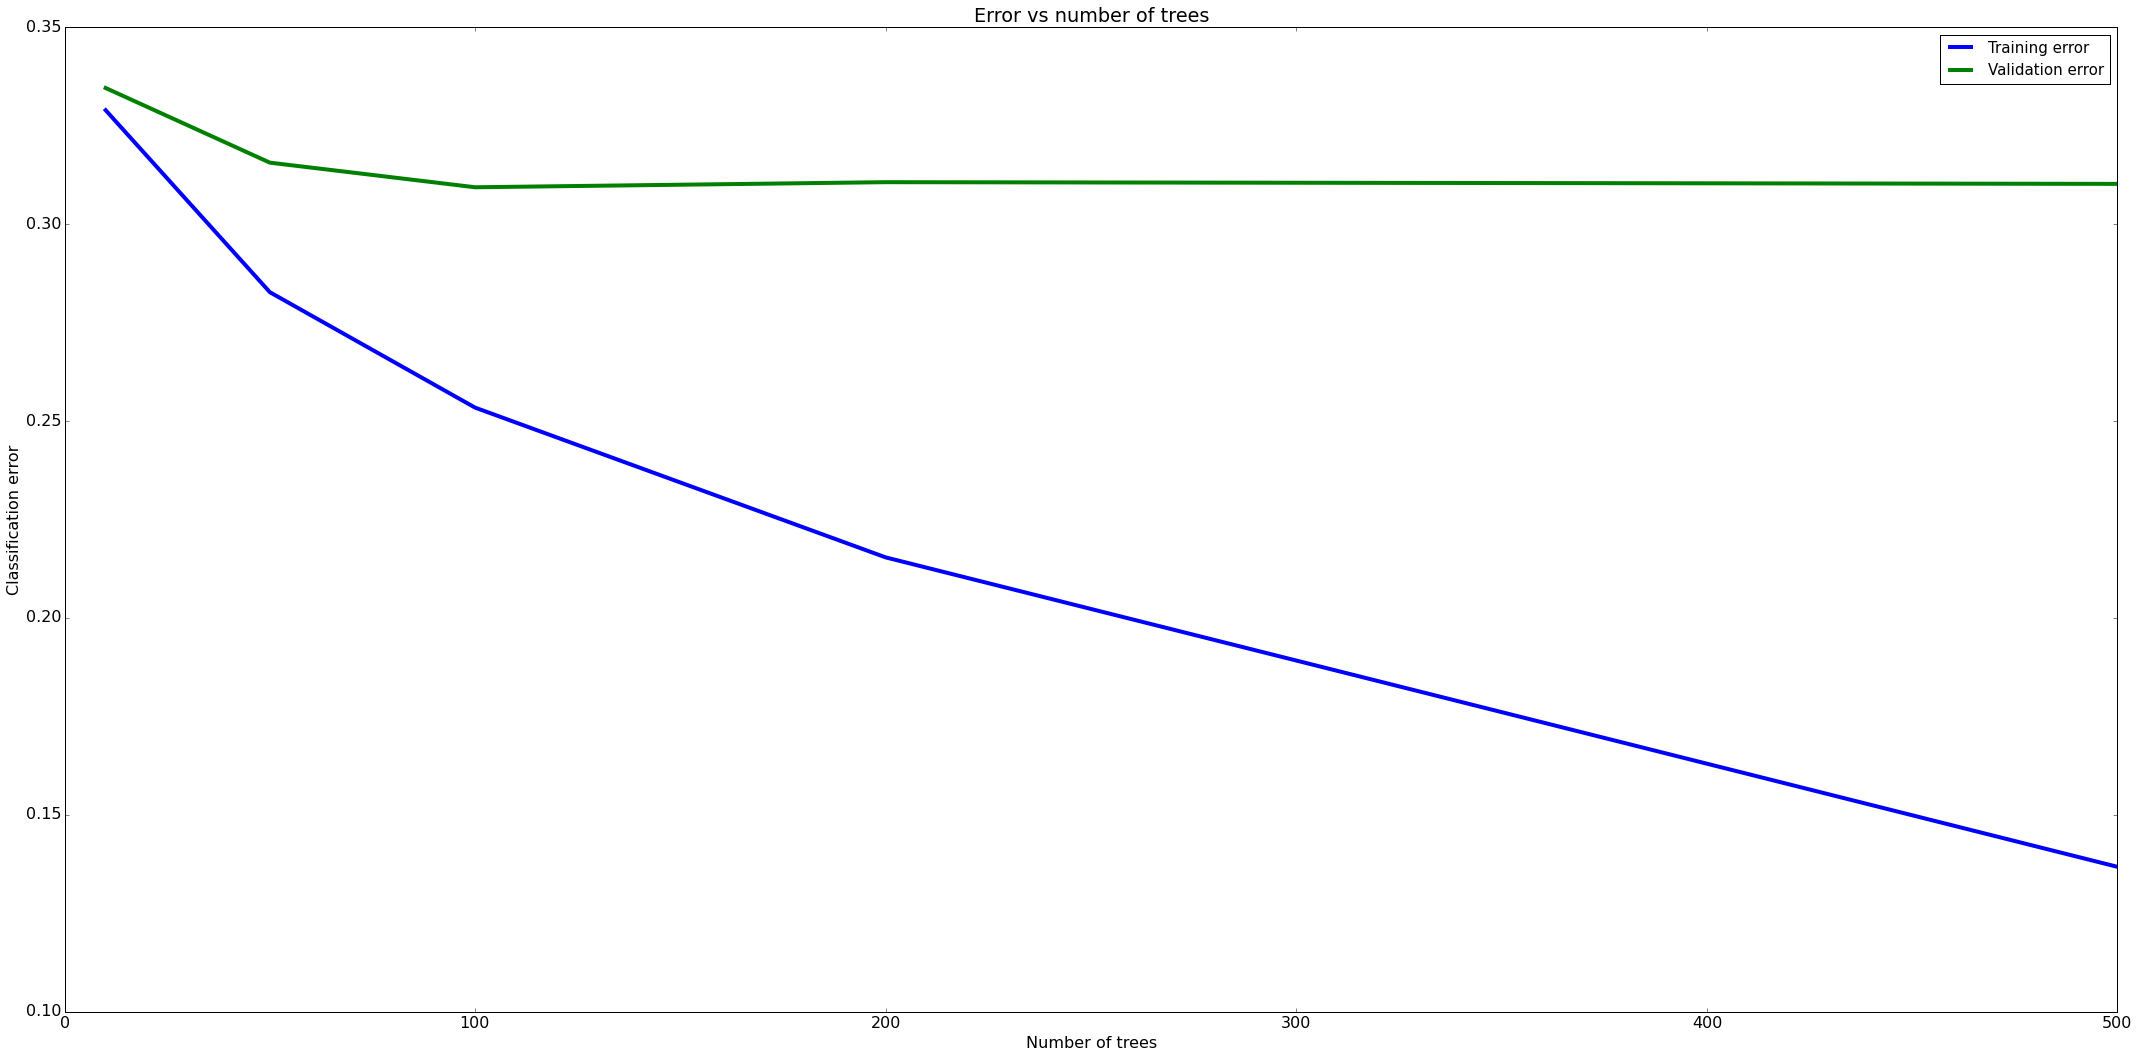

In [258]:
plt.plot([10, 50, 100, 200, 500], training_errors, linewidth=4.0, label='Training error')
plt.plot([10, 50, 100, 200, 500], validation_errors, linewidth=4.0, label='Validation error')

make_figure(dim=(20,10), title='Error vs number of trees',
            xlabel='Number of trees',
            ylabel='Classification error',
            legend='best')